<a href="https://colab.research.google.com/github/shahiryar/gender-name-model/blob/main/Name_gender.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
df = pd.read_csv('https://query.data.world/s/xmxrav4asjyyft45swra4ha6mlakhp?dws=00000')

In [ ]:
df.head()

,name,gender,probability
0,Aaban,M,1.0
1,Aabha,F,1.0
2,Aabid,M,1.0
3,Aabriella,F,1.0
4,Aada,F,1.0


In [ ]:
# Perform one-hot encoding on the "gender" column
one_hot_encoded = pd.get_dummies(df['gender'])

# Remove the "gender" column from the original DataFrame
df_encoded = df.drop(['gender', 'probability'], axis=1)

# Concatenate the encoded columns with the remaining columns
df_encoded = pd.concat([df_encoded, one_hot_encoded], axis=1)

# Add the "gender" column where 1 denotes a male
df_encoded['gender'] = df_encoded['M']

In [ ]:
# Remove the "gender" column from the original DataFrame
df_encoded = df_encoded.drop(['F', 'M'], axis=1)

# Print the encoded DataFrame with the "gender" column
print(df_encoded)

            name  gender
0          Aaban       1
1          Aabha       0
2          Aabid       1
3      Aabriella       0
4           Aada       0
...          ...     ...
95021      Zyvon       1
95022    Zyyanna       0
95023      Zyyon       1
95024      Zzyzx       1
95025  undefined       0

[95026 rows x 2 columns]


In [ ]:
# Function to extract the length of a name
def get_name_length(name):
    return len(name)

# Function to extract the last letter of a name
def get_last_letter(name):
    return ord(name[-1].lower()) - 96

def get_soundex_code(name):
    # Convert the name to uppercase
    name = name.upper()

    # Create a dictionary to map each letter to its Soundex code
    soundex_mapping = {
        'B': '1', 'F': '1', 'P': '1', 'V': '1',
        'C': '2', 'G': '2', 'J': '2', 'K': '2', 'Q': '2', 'S': '2', 'X': '2', 'Z': '2',
        'D': '3', 'T': '3',
        'L': '4',
        'M': '5', 'N': '5',
        'R': '6'
    }

    # Initialize the Soundex code with the first letter of the name
    soundex_code = name[0]

    # Iterate through the remaining letters of the name
    for letter in name[1:]:
        # Skip non-alphabetic characters
        if not letter.isalpha():
            continue

        # Get the Soundex code for the current letter
        code = soundex_mapping.get(letter, '')

        # Add the code to the Soundex code if it is different from the previous code
        if code != soundex_code[-1]:
            soundex_code += code

    # Remove any occurrences of '0' in the Soundex code
    soundex_code = soundex_code.replace('0', '')

    # Pad the Soundex code with zeros to ensure a length of 4
    soundex_code = soundex_code.ljust(4, '0')

    # Return the resulting Soundex code
    return soundex_code


# Function to extract the Metaphone representation of a name
def get_metaphone(name):
    # Implement Metaphone representation logic here
    # Return the Metaphone representation for the given name
    pass

# Function to count the number of vowels in a name
def count_vowels(name):
    vowels = ['a', 'e', 'i', 'o', 'u']
    return sum(1 for letter in name.lower() if letter in vowels)

# Function to count the number of consonants in a name
def count_consonants(name):
    consonants = ['b', 'c', 'd', 'f', 'g', 'h', 'j', 'k', 'l', 'm', 'n', 'p', 'q', 'r', 's', 't', 'v', 'w', 'x', 'y', 'z']
    return sum(1 for letter in name.lower() if letter in consonants)

# Function to extract the origin or culture of a name
def get_name_origin(name):
    # Implement name origin extraction logic here
    # Return the origin or culture of the given name
    pass

# Function to extract n-grams from a name
def extract_ngrams(name, n):
    ngrams = []
    for i in range(len(name) - n + 1):
        ngrams.append(name[i:i + n])
    return ngrams

def soundex_to_number(soundex):
    """
    Converts a Soundex code to a numerical value.

    Args:
        soundex (str): The Soundex code to be converted.

    Returns:
        int: The numerical value corresponding to the Soundex code.
    """
    number = ''
    for char in soundex:
        number += str(ord(char) - 48)  # Convert character to numerical value

    return int(number)


In [ ]:
def extract_name_features(name):
    '''reutrns a list of features [number of letters, last letter, number of vowels, number of consonents, soundex code]'''
    name_features = [get_name_length(name), 
    get_last_letter(name),
    count_vowels(name),
    count_consonants(name),
    soundex_to_number(get_soundex_code(name))]
    
    return name_features


In [ ]:
extract_name_features('Shahiryar')

In [ ]:
# Function to process the name column and return a DataFrame with extracted features
def process_name_column(df, name_column):
    # Apply the extract_name_features() function to each name in the name column
    extracted_features = df[name_column].apply(extract_name_features)

    # Create a new DataFrame with the extracted features
    df_features = pd.DataFrame(extracted_features.tolist())

    feature_names = ['name_len','last_letter', 'vowel_count', 'consonants_count', 'soundex_code']
    df_features.columns = feature_names

    # Concatenate the new DataFrame with the original DataFrame
    df_processed = pd.concat([df, df_features], axis=1)


    # Return the processed DataFrame
    return df_processed

In [ ]:
df_cleaned = process_name_column(df_encoded, 'name')

In [ ]:
df_cleaned.head()

,name,gender,name_len,last_letter,vowel_count,consonants_count,soundex_code
0,Aaban,1,5,14,3,2,17150
1,Aabha,0,5,1,3,2,17100
2,Aabid,1,5,4,3,2,17130
3,Aabriella,0,9,1,5,4,17164
4,Aada,0,4,1,3,1,17300


In [ ]:
X = df_cleaned.loc[:,['name_len','last_letter', 'vowel_count', 'consonants_count', 'soundex_code']]
y = df_cleaned['gender']

print(X.head())
print(y.head())

   name_len  last_letter  vowel_count  consonants_count  soundex_code
0         5           14            3                 2         17150
1         5            1            3                 2         17100
2         5            4            3                 2         17130
3         9            1            5                 4         17164
4         4            1            3                 1         17300
0    1
1    0
2    1
3    0
4    0
Name: gender, dtype: uint8


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()

rfc.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
y_pred = rfc.predict(X_test)

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Confusion Matrix:
[[10529  1523]
 [ 1538  5416]]
Accuracy: 0.8389455961275387


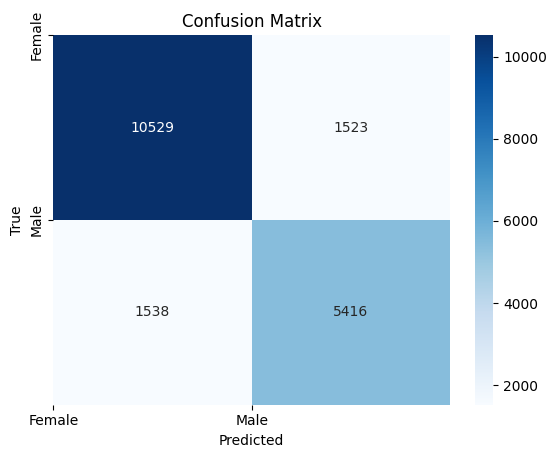

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Create a list of class labels
labels = ['Female', 'Male']

# Create a heatmap of the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', xticklabels=labels, yticklabels=labels)

# Add labels, title, and ticks
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(np.arange(len(labels)), labels)
plt.yticks(np.arange(len(labels)), labels)

# Show the plot
plt.show()
